In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Comparison ##

In [6]:
# Basics comparisions like greater then or equal to
3 > 1

True

In [7]:
# the return type of a comparision is a bool
type(3 > 1)

bool

In [ ]:
# Capitalize that bool
True

In [ ]:
true

In [ ]:
# Equality is not the same as assignment
3 = 3

In [ ]:
#This is equality 
3 == 3.0


In [ ]:
# Not equal to is 
10 != 2

In [ ]:
x = 14
y = 3

In [ ]:
# Find if x is between 1 and 100


In [ ]:
# Find if x-y is between 1 and 100 

## Comparisons with arrays

In [8]:
# we can compare an array and one value
pets = make_array('cat', 'cat', 'dog', 'cat', 'dog', 'rabbit')

In [9]:

#Each element is compared to that value, 
#and the comparison evaluates to an array of Booleans

pets == 'cat'

array([ True,  True, False,  True, False, False])

In [12]:
#Lets sum up 
result = pets == 'cat'
sum(result)

3

In [14]:
# Alternativaly we can use np.count_nonzero to count the number
# of true values
np.count_nonzero(pets == 'dog')

2

## Simulation

Let's play a game: we each roll a die. 

If my number is bigger: you pay me a dollar.

If they're the same: we do nothing.

If your number is bigger: I pay you a dollar.

Steps:
1. Find a way to simulate two dice rolls.
2. Compute how much money we win/lose based on the result.
3. Do steps 1 and 2 10,000 times.

### Conditional Statements

In [32]:
# Lets make a function that simulates rolling a dice


def one_round(my_roll, your_roll):
    if my_roll > your_roll:
        return 1

In [33]:
# Try rolling your dices
one_round(4, 3)

1

In [34]:
# What if my roll is less then your roll? 
one_round(2, 6)

In [35]:
# We must update the function with more conditionals

#. I win , you win, we get same roll
def one_round(my_roll, your_roll):
    if my_roll > your_roll:
        return 1
    elif your_roll > my_roll:
        return -1
    elif your_roll == my_roll:
        return 0

In [36]:
# try the different cases
one_round(1, 1)

0

In [37]:
one_round(6, 5)

1

In [38]:
one_round(7, -1)

1

### Random Selection

In [39]:
# Here is an array
mornings = make_array('wake up', 'sleep in')

In [40]:
# Randomly choose an element a few times 
np.random.choice(mornings)

'wake up'

In [41]:
np.random.choice(mornings)

'sleep in'

In [42]:
np.random.choice(mornings)

'wake up'

In [43]:
# We can choose the sample size with the optional argument
np.random.choice(mornings, 7)

array(['wake up', 'sleep in', 'sleep in', 'wake up', 'sleep in',
       'sleep in', 'wake up'], dtype='<U8')

In [44]:
# Lets randomly choose 7 wake or sleep and then count the result
morning_week = np.random.choice(mornings, 7)
morning_week

array(['wake up', 'sleep in', 'sleep in', 'wake up', 'sleep in',
       'wake up', 'sleep in'], dtype='<U8')

In [45]:
sum(morning_week == 'wake up')

3

In [46]:
sum(morning_week == 'sleep in')

4

In [47]:
die_faces = np.arange(1, 7)

In [48]:
np.random.choice(die_faces)

5

In [49]:
# Noow that we can simulate randomness
# We will simulate rolling a dice 

# Write a function that rolls my dice and your dice
# then returns if the result of who one the game 
def simulate_one_round():
    my_roll = np.random.choice(die_faces)
    your_roll = np.random.choice(die_faces)
    return one_round(my_roll, your_roll)

In [50]:
simulate_one_round()

1

### Appending Arrays

In [24]:
# We can attach an array to the end of an other using np.append
first = np.arange(4)
second = np.arange(10, 17)

In [25]:
# add a value to the end of and array 
np.append(first, 6)

array([0, 1, 2, 3, 6])

In [26]:
#check it 
first

array([0, 1, 2, 3])

In [27]:
# add an array to another
np.append(first, second)

array([ 0,  1,  2,  3, 10, 11, 12, 13, 14, 15, 16])

In [28]:
# check first 
first

array([0, 1, 2, 3])

In [29]:
# check second
second

array([10, 11, 12, 13, 14, 15, 16])

### Repeated Betting ###

In [51]:
# We will append results of an experiment to an array
results = make_array()

In [52]:
# This will allow us to run statistics on the results 
results = np.append(results, simulate_one_round())
results

array([0.])

## `For` Statements

In [53]:
# For statement siterate through every element in an array
for pet in make_array('cat', 'dog', 'rabbit'):
    print('I love my ' + pet)

I love my cat
I love my dog
I love my rabbit


In [ ]:
# this is the equivalent line of code 
pet = make_array('cat', 'dog', 'rabbit').item(0)
print('I love my ' + pet)

pet = make_array('cat', 'dog', 'rabbit').item(1)
print('I love my ' + pet)

pet = make_array('cat', 'dog', 'rabbit').item(2)
print('I love my ' + pet)

In [54]:
# we can use this to simulate experiments repeatedly
# like our game results and save the results to an array

game_outcomes = make_array()

for i in np.arange(5):
    game_outcomes = np.append(game_outcomes, simulate_one_round())
    
game_outcomes

array([-1.,  1., -1., -1.,  0.])

In [55]:
# Even run it an 1000 times 

game_outcomes = make_array()

for i in np.arange(10000):
    game_outcomes = np.append(game_outcomes, simulate_one_round())
    
game_outcomes

array([-1., -1., -1., ..., -1.,  1., -1.])

In [56]:
results = Table().with_column('My winnings', game_outcomes)

In [57]:
# graph the results using bargraph 
results

My winnings
-1
-1
-1
-1
1
1
1
1
1
1


In [59]:
results.group('My winnings')

My winnings,count
-1,4169
0,1642
1,4189


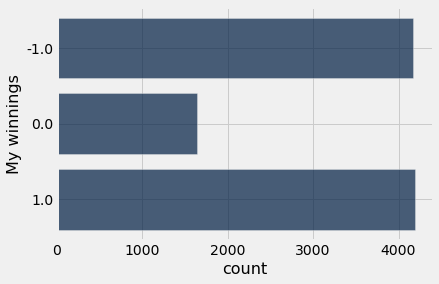

In [60]:
results.group('My winnings').barh('My winnings')